# Housing Price Prediction

In [32]:
#importing libraries
import numpy as np    ##  for mathematical Calculation
import pandas as pd
import seaborn as sns   ## # For data visualization
import matplotlib.pyplot as plt  ## for Plotting Graphs
import warnings   
warnings.filterwarnings('ignore')      ## To ignore any warnings which shows at running time
plt.style.use('dark_background')

### Importing the Data

In [33]:
#importing data
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


### Understanding the Data

In [34]:
#check the features present in our data
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

We have __20 independent variables__ and __1 target variable__, i.e. __Sale Price__ in the dataset.

In [35]:
# Print data types for each variable 
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [36]:
# The shape of the dataset
data.shape

(21613, 21)

In [37]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

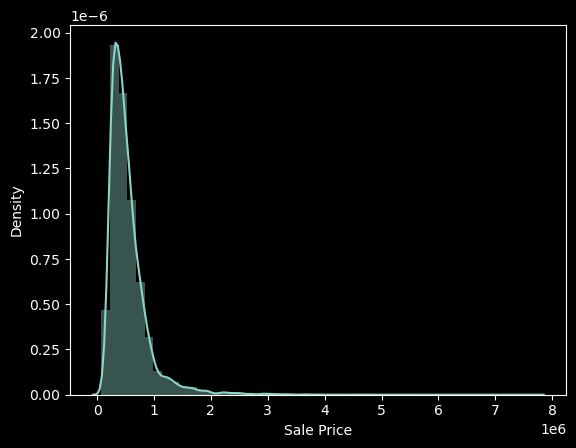

In [38]:
 ## Visualising the target variable
sns.distplot(data['Sale Price']) 
plt.show()

* We can see a lot of outliers in the Sale Price and it is __not normally distributed__

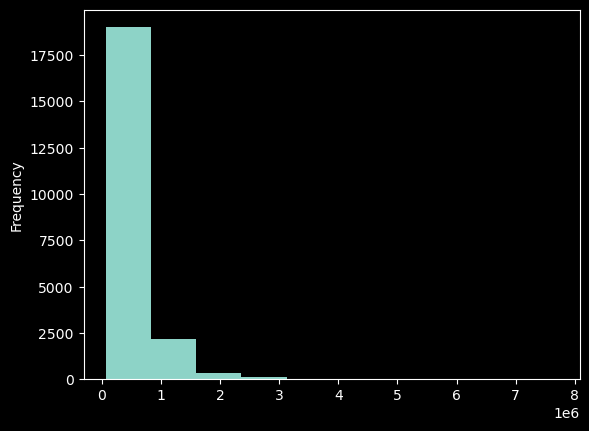

In [39]:
#distribution of target variable
data['Sale Price'].plot.hist()
plt.show()

Text(0.5, 0.98, '')

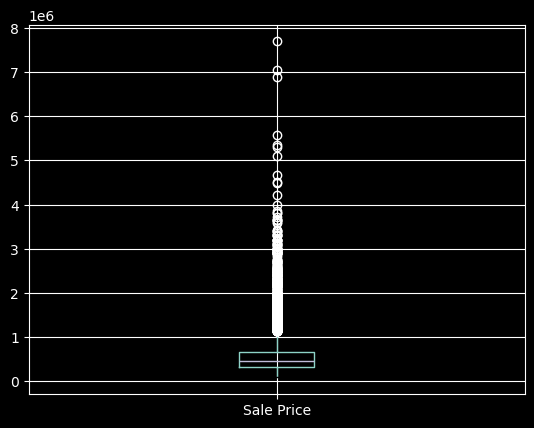

In [40]:
data.boxplot(column = 'Sale Price')
plt.suptitle("")

* We can see that there are __higher number__ of houses with very high sale price, which are appearing to be the __outliers__.

### Treating the Outliers by Imputing method

In [41]:
# checking quantiles
q1 = data['Sale Price'].quantile(0.25)   # first quartile, q1
q3 = data['Sale Price'].quantile(0.75)   # third quartile, q3
q1, q3

(321950.0, 645000.0)

In [42]:
#calculating iqr
iqr = q3 - q1   # inter-quartile range, iqr
iqr

323050.0

In [43]:
# Calculation upper_limit and lower_limit
upper_limit = q3 + 1.5*iqr   
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [44]:
# imputing outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [45]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [46]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

* Now, It can be inferred that there is __no outliers__ exist

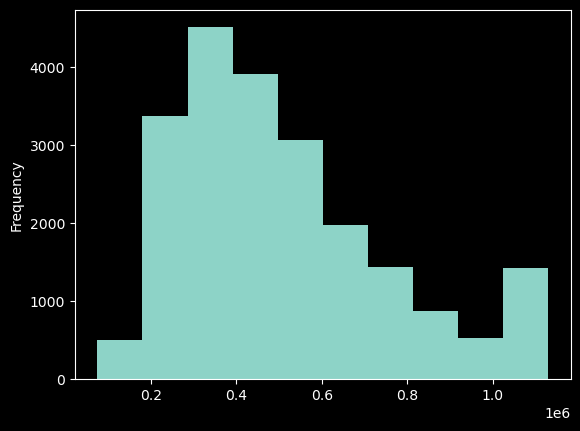

In [47]:
# Histgram graph of target varible
data['Sale Price'].plot.hist()
plt.show()

* Mojority of house's selling price ranges from __200000__ to __600000__
* The distribution is __fairly normal__.


### Treating the Missing values

In [48]:
#checking missing values
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

* There are __missing values__ in Sale Price, No of Bathrooms, Flat Area (in Sqft), Lot Area (in Sqft), Area of the House from Basement (in Sqft), Zipcode, Latitude, Longitude and Living Area after Renovation (in Sqft) features.
* For __numerical variables__: imputation using __mean__ or __median__
* For __categorical variables__: imputation using __mode__

In [49]:
# Removing the missing values present in target varible in this case:
data.dropna(subset = 'Sale Price', inplace=True, axis = 0)
data['Sale Price'].isnull().sum()

0

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

* We can see clearly that the length of data is reduced to __21609__

In [51]:
#isolating numerical variables
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [52]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

* Still remaining missing values in __No of Times Visited__ and __Zipcode__ 

# Zipcode Transform

In [54]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [55]:
data['Zipcode'].shape

(21609,)

* It can be inferred that Zipcode is in __1D__

In [56]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

* Now, It is __2D__ by using the reshape() function.

In [58]:
# Imputing the missing values by mode/most_frequent
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [59]:
data.drop(columns = 'No of Times Visited', inplace = True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [61]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

* Finally, there is __no__ any missing values in the dataset

# Other Transformations

In [62]:
# new variable creation
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [63]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


* A __new variable__ is created in the last column of dataset, which having the unique values as __Yes__ and __No__

In [64]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

* Again a new __Purchase Year__ variable created which containing only __Years__

In [65]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [66]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


* Finally, a __Years Since Renovation__ variable created which tells how many years ago was the renovation done

In [67]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

* In this, Useless/redundant variables are dropped and the __dimesionality__ is reduced

In [68]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


## Analysis of Independent variable with Mean Sale Price

In [69]:
data.drop( columns = 'ID', inplace = True)

* House Id is __not a significant variable__ and it is not required as a feature for building model

In [70]:
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [71]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

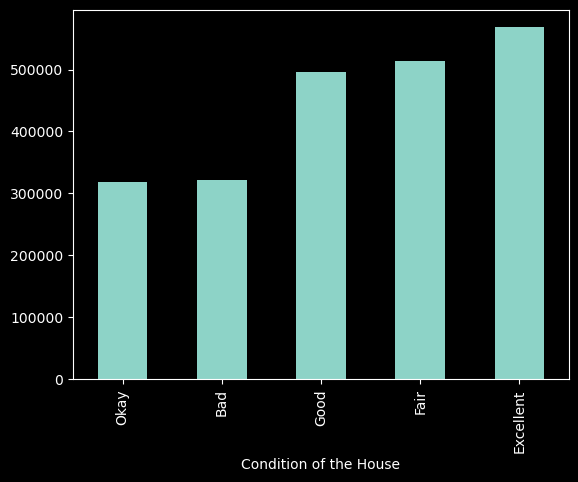

In [112]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* Bad Houses and Okay Houses are almost same in Mean Sale Price
* And Fair houses and Good houses are almost same in mean sale price
* Majority of houses in __Excellent__ condition

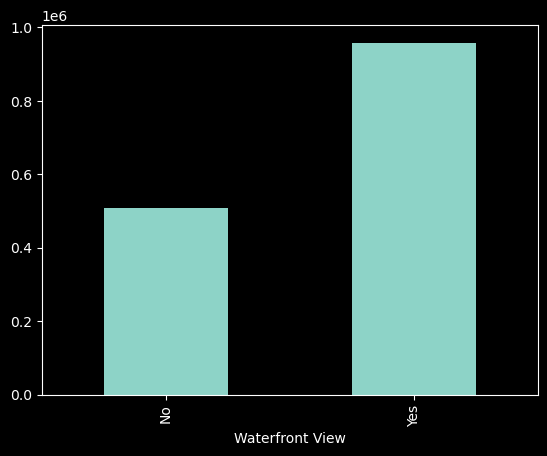

In [114]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* __Majority__ Houses in the dataset having __Waterfront View__
* And Mean Sale Price of Waterfront View houses is a little more

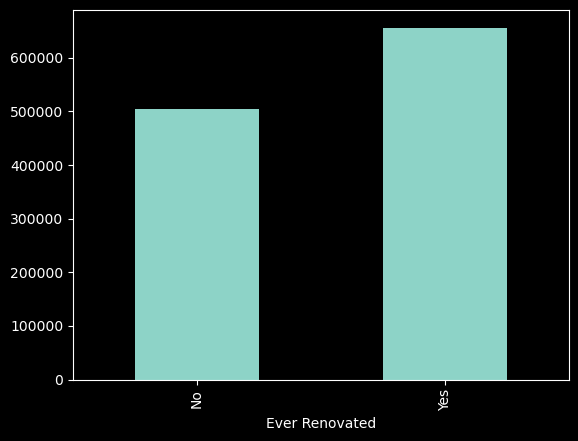

In [115]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* The houses are __more renovated__ as compared that of Not renovated
* Also Mean Sale Price is little more

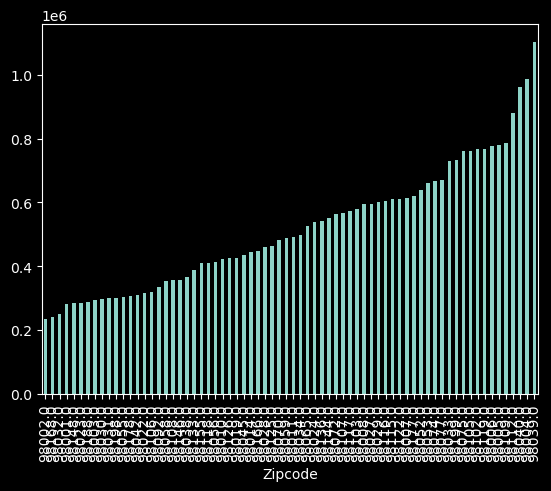

In [116]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* Here, We can see a lot of __variety__ of Mean Sale Price with Differnt Zipcode

# Linear Regression


In [77]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

* Sale Price is a target variable so seggregating it

## Variable Transformation

In [78]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

* A function is created to checking the disribution of independent numerical varibles

In [79]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

* Creating a new variable and storing all numerical variables in it

In [80]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

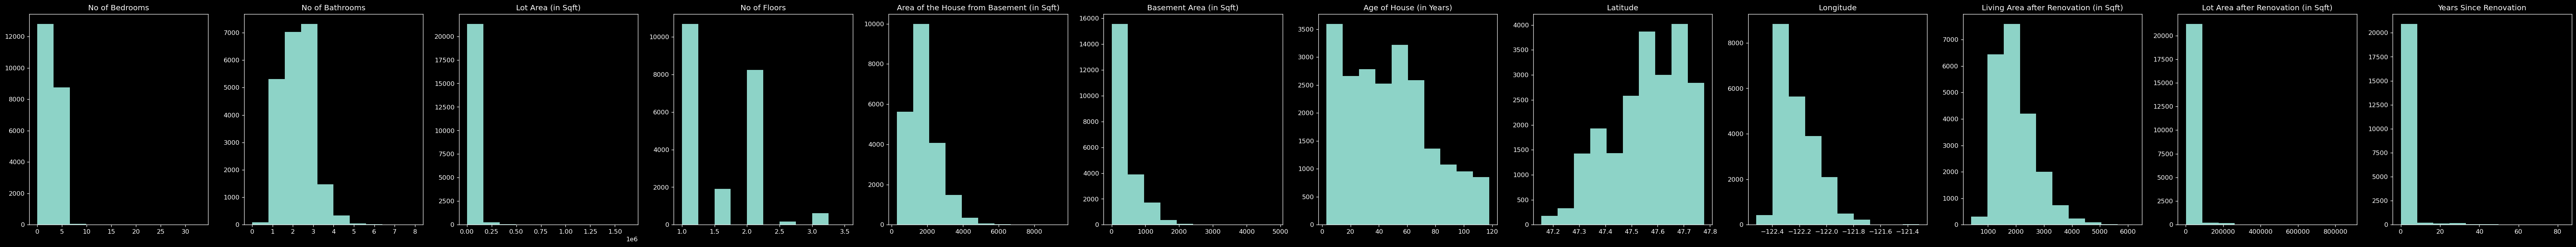

In [81]:
distribution(X, numerical_columns)

Following inferences can be made from the above hist plots:

* Only two of them are fairly normal distributed, i.e __"Age of House (in Years)" and "Latitude"__
* And all remaining plots are __right_skewed distributed__

In [82]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


* This step is for removing the all right_skewed variables 

In [83]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

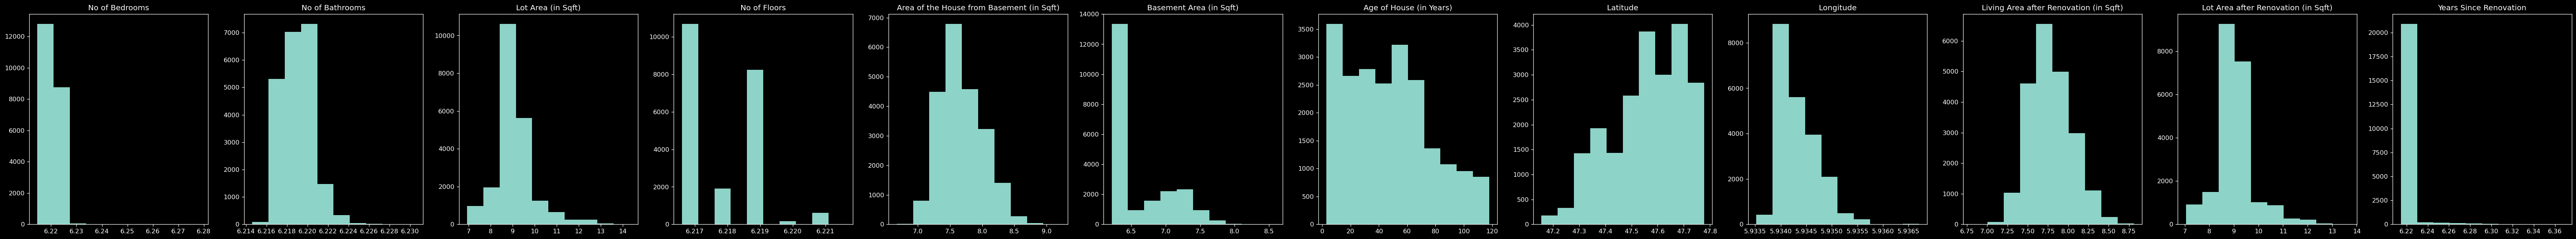

In [84]:
distribution(X, numerical_columns)

* Now, We can see clearly that all hist plots are almost fairly normal disributed

## Scaling the dataset

In [85]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,No,Fair,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,No,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,No,Fair,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,Yes,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,No,Fair,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,No,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,No,Excellent,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,No,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,No,Fair,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,No,6.214608


In [86]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


## Checking and Removing Multicollinearity

In [88]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.028514,0.349933,0.509475,0.276781,-0.154613,-0.153163,-0.008867,0.129997,0.404806,0.154329,0.018555,-0.006734
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,-0.124874,0.635778,0.696041,0.254042,-0.506206,-0.204097,0.024506,0.223332,0.572407,0.095798,0.050239,0.004644
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,-0.058922,0.705725,0.853690,0.373296,-0.318146,-0.199380,0.052538,0.240124,0.739515,0.318573,0.055111,0.024552
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.066113,0.165808,0.319715,0.056278,-0.006100,-0.279267,-0.145945,0.376102,0.361633,0.917835,0.022789,0.033036
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,-0.263676,0.461442,0.548408,-0.266598,-0.489232,-0.059289,0.049640,0.125724,0.277817,-0.210687,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.016650,0.070332,0.063294,0.063276,0.026149,0.030286,-0.014275,-0.041934,0.080573,0.083232,0.093291,0.105822
Condition of the House,0.028514,-0.124874,-0.058922,0.066113,-0.263676,0.016650,1.000000,-0.143747,-0.153588,0.176043,0.361383,0.003076,-0.015008,-0.106546,-0.090182,0.073370,-0.060152,-0.012115
Overall Grade,0.349933,0.635778,0.705725,0.165808,0.461442,0.070332,-0.143747,1.000000,0.723789,0.116078,-0.456711,-0.185844,0.111226,0.201765,0.676795,0.167561,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,-0.153588,0.723789,1.000000,-0.111289,-0.448692,-0.285278,-0.015269,0.360187,0.720753,0.301163,0.026070,0.013457
Basement Area (in Sqft),0.276781,0.254042,0.373296,0.056278,-0.266598,0.063276,0.176043,0.116078,-0.111289,1.000000,0.153930,0.103527,0.121208,-0.177197,0.166776,0.045337,0.067745,0.028257


<Axes: >

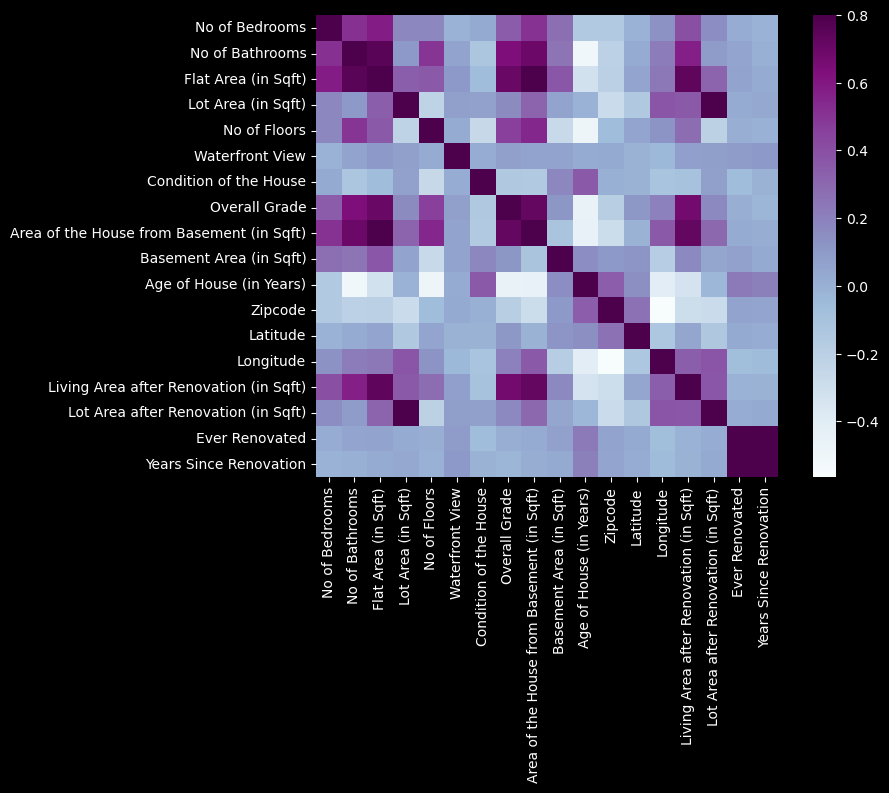

In [90]:
# heat map to visualize the correlation
matrix = X.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [91]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

### Calculating Variation Inflation Factor(VIF)

In [92]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.726029
No of Bathrooms                               3.422650
Flat Area (in Sqft)                          21.455813
Lot Area (in Sqft)                            6.841853
No of Floors                                  2.387300
Waterfront View                               1.043717
Condition of the House                        1.260151
Overall Grade                                 2.892590
Area of the House from Basement (in Sqft)    23.253430
Basement Area (in Sqft)                       6.552309
Age of House (in Years)                       2.444063
Zipcode                                       1.655348
Latitude                                      1.182756
Longitude                                     1.876030
Living Area after Renovation (in Sqft)        2.857392
Lot Area after Renovation (in Sqft)           6.602902
Ever Renovated                                3.022379
Years Since Renovation                        2.871700
dtype: flo

In [93]:
VIF[VIF == VIF.max()].index[0]

'Area of the House from Basement (in Sqft)'

* __Area of the House from Basement (in Sqft)__ variable having the maximum VIF

In [94]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

* Removing the Multicollinearity which having VIF is greater than 5

In [95]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.629203,-0.563993,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.937193,-0.087181,-0.629203,-0.563993,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.629203,-1.468566,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.915604,-0.087181,2.444136,-0.563993,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.629203,0.340581,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


### Remaining Columns

In [96]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.487445
 No of Bathrooms                           2.946117
 No of Floors                              2.184025
 Waterfront View                           1.039670
 Condition of the House                    1.253562
 Overall Grade                             2.526821
 Basement Area (in Sqft)                   1.601065
 Age of House (in Years)                   2.375189
 Zipcode                                   1.652067
 Latitude                                  1.174666
 Longitude                                 1.854070
 Living Area after Renovation (in Sqft)    2.438236
 Lot Area after Renovation (in Sqft)       1.550612
 Ever Renovated                            3.017322
 Years Since Renovation                    2.868099
 dtype: float64,
 15)

* Now, we can see clearly anyone has no VIF more than 5

## Train/Test set

In [97]:
X = vif_data[:]

In [98]:
Y = data['Sale Price']

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 15), (6483, 15), (15126,), (6483,))

## Training model

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [102]:
lr.coef_

array([  -972.59012704,  43984.80195802,  24122.65998532,  20582.15015283,
        16291.99682425, 112415.01304558,  16513.29858196,  68440.44772651,
       -12658.74258492,  73317.87448853,  -9323.69957869,  60588.9721059 ,
         2913.01633392,  16544.70706425, -10606.64508901])

In [103]:
predictions = lr.predict(x_test)

In [104]:
lr.score(x_test, y_test)

0.7259458273032209

###  Residuals Analysis

In [105]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [106]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

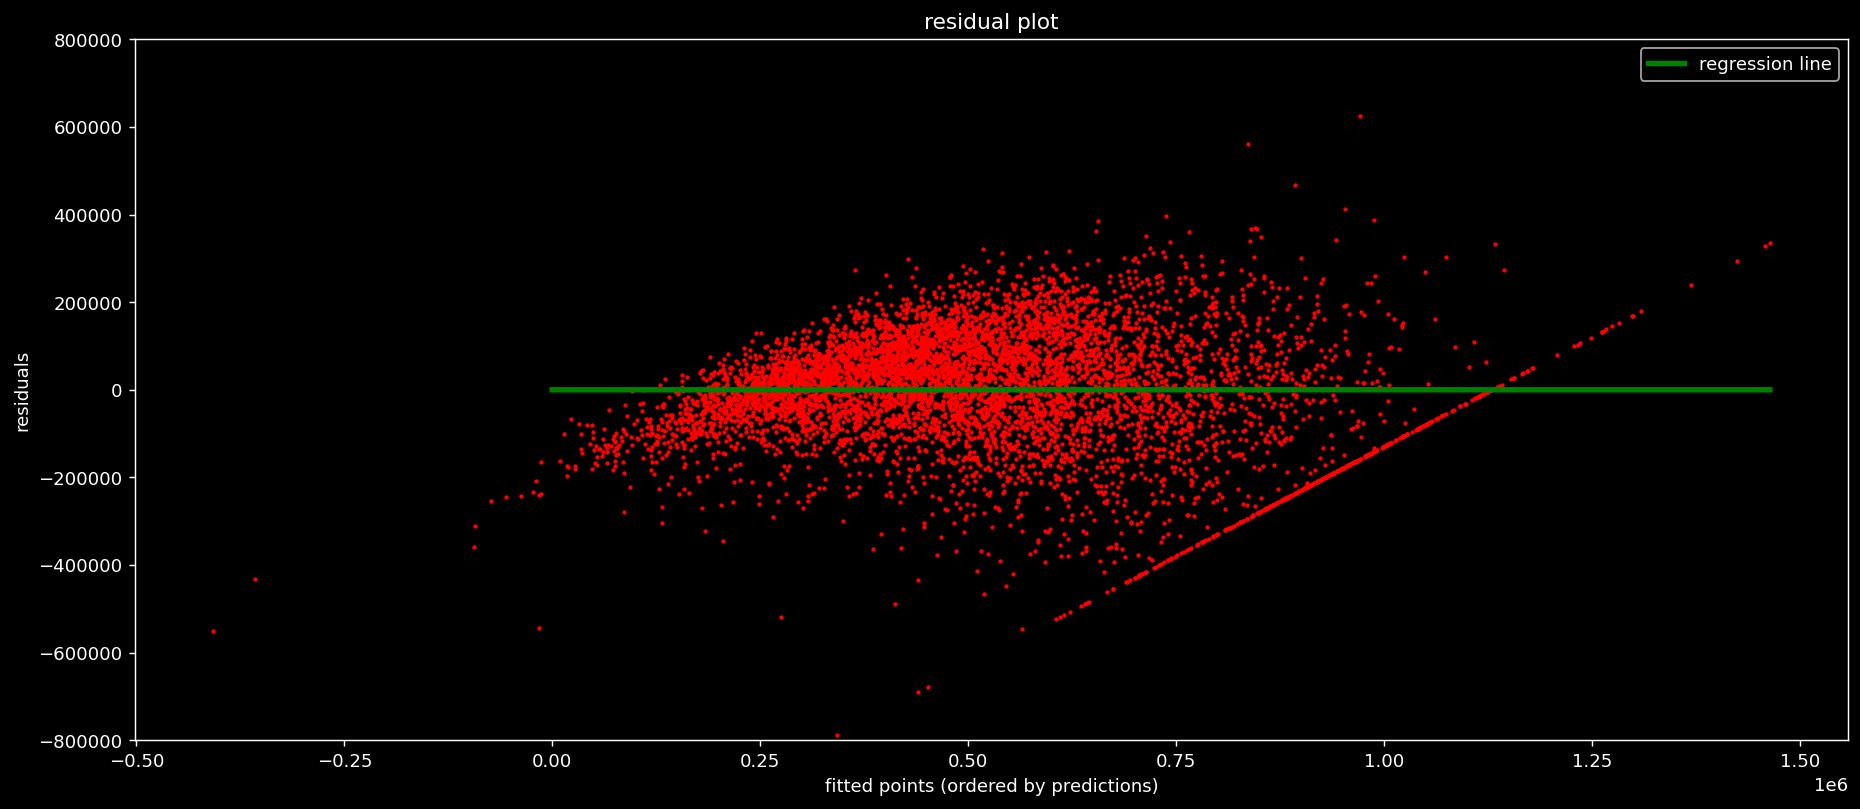

In [107]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

* The residuals are __densily populated__ between the limits __-200000 and 200000__
* So, there is good probability that the residuals is normally distributed

## 2. Distribution of errors

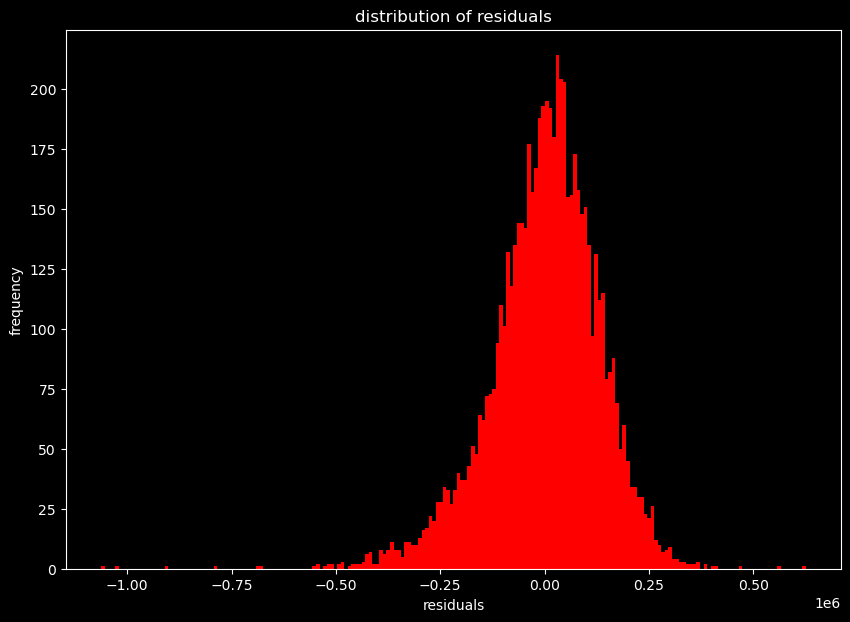

In [108]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

* It can be inferred that the residuals follow the __normall distribution__

## Model Coefficients

In [109]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


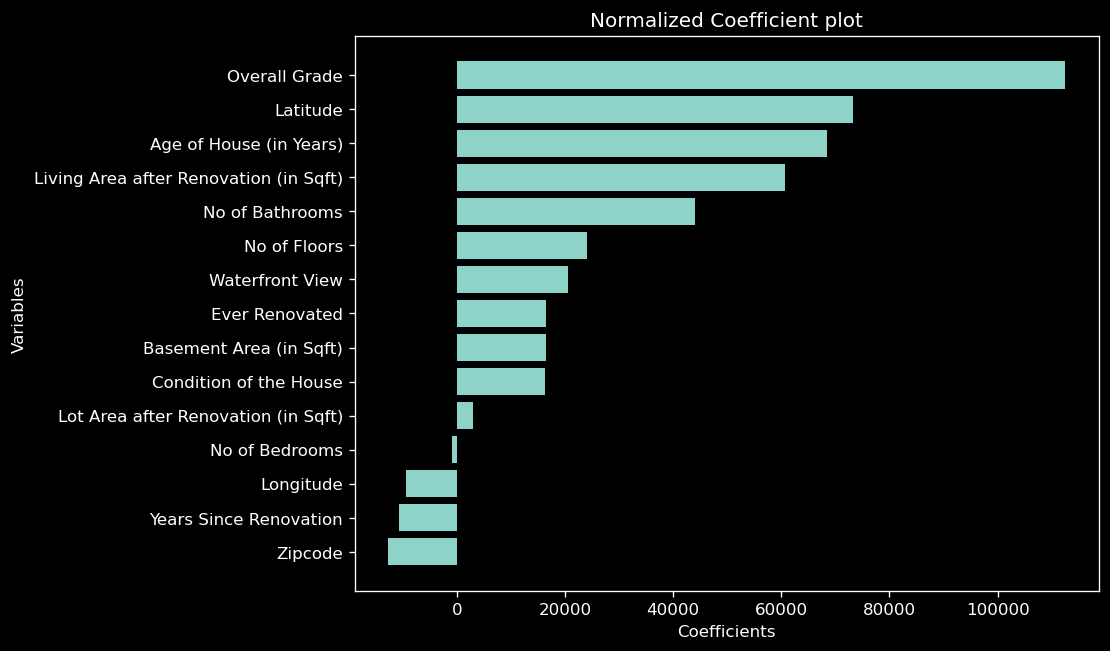

In [110]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

* The Overall Grade plays a __majore role__ in the 'Sale Price' of the house
* Latitude played a __positve significant role__ and this tells us that the houses in the __North East region__ are relatively higher __expensive__ than other places
* __Area of House__ also played a __positive significant role__ that tells the older houses are more expensive than the other ones
* __Year Since Renovation__ played a __nigative significant role__ that tells As the time from the last renovation of the house is increased, the price of the house is decreased
* And also other variables played a positive significant role